# DS-SF-36 | 06 | $k$-Nearest Neighbors | Codealong | Starter Code

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-06-iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A | Activity | Iris Dataset | Exploratory Data Analysis

In [20]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

In [8]:
df[df.Species == 'Setosa'].SepalLength.min()

4.2999999999999998

In [10]:
df[df.Species == 'Setosa'].SepalLength.max()

5.7999999999999998

In [12]:
df[df.Species == 'Setosa'].SepalLength.mean()

5.005999999999999

In [9]:
df[df.Species == 'Virginica'].SepalLength.min()

4.9000000000000004

In [11]:
df[df.Species == 'Virginica'].SepalLength.max()

7.9000000000000004

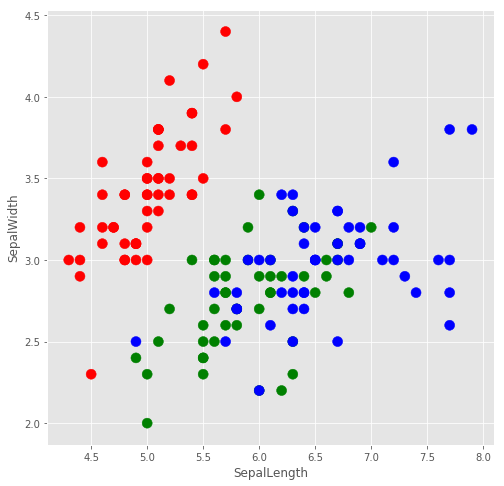

In [24]:
df.plot(kind = 'scatter', x = 'SepalLength', y = 'SepalWidth', s = 100, figsize = (8, 8), c = color)

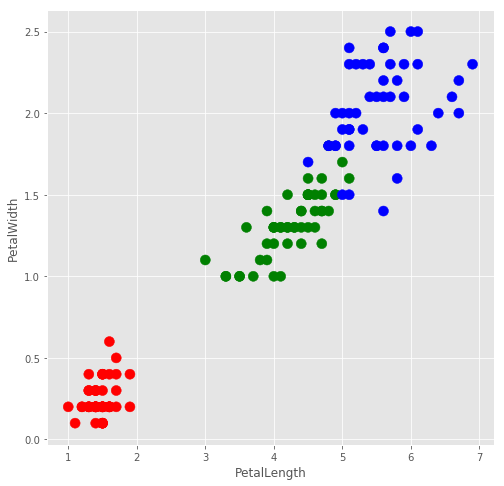

In [25]:
df.plot(kind = 'scatter', x = 'PetalLength', y = 'PetalWidth', s = 100, figsize = (8, 8), c = color)

/Users/maxie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165f9310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11744bdd0>]], dtype=object)

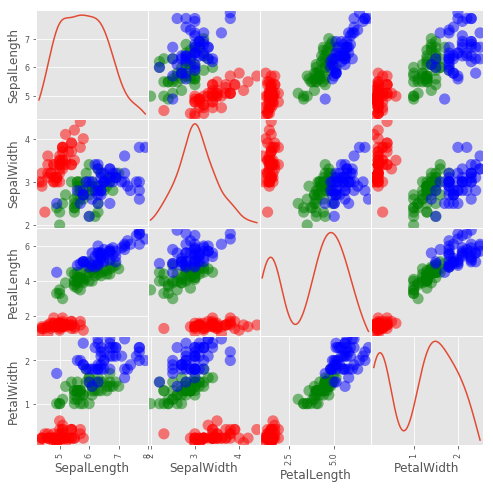

In [27]:
pd.tools.plotting.scatter_matrix(df[ ['SepalLength', 'SepalWidth','PetalLength','PetalWidth'] ], diagonal = 'kde', s = 500, figsize = (8, 8), c = color)

## Part B | Activity | Hand-Coded Classifier

In [28]:
c = df.Species

In [31]:
def my_first_classifier(row):
    if row.PetalLength > 5:
        return 'Virginica'
    elif row.PetalLength > 2.5:
        return 'Versicolor'
    else:
        return 'Setosa'

In [32]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145     Virginica
146    Versicolor
147     Virginica
148     Virginica
149     Virginica
Length: 150, dtype: object

In [33]:
(c_hat != c).sum()

10

In [34]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class']) #confusion matrix: this is to compare the built model vs. the real data

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,49,9
Virginica,0,1,41


## Part C | Classification Metrics

### Accuracy

In [35]:
(c_hat == c).mean()

0.93333333333333335

### Misclassification rate

In [36]:
(c_hat != c).mean()

0.066666666666666666

## Part D | $k$-Nearest Neighbors ($k$-NN)

### Feature matrix and response vector

- (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
columns_X = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [ ]:
# TODO

In [ ]:
c = df.Species

In [ ]:
c

### $k$-Nearest Neighbors

- (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

You can measure the precision of your prediction with `.score()`

In [ ]:
model.score(X, c)

In [ ]:
c_hat = model.predict(X)

In [ ]:
(c_hat == c).mean()

In [ ]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

### Train/test sets

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

50% of the dataset to train the model; the rest to test the model

In [ ]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [ ]:
train_df

In [ ]:
test_df = df.drop(train_df.index)

### Feature matrix `train_X` and response vector `train_c`

In [ ]:
train_X = train_df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

### Feature matrix `test_X` and response vector `test_c`

- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
# TODO

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

In [ ]:
gs.cv_results_

In [ ]:
gs.cv_results_.keys()

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gs.score(train_X, train_c)

In [ ]:
gs.score(test_X, test_c)

## Final model

In [ ]:
# TODO